In [81]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [82]:
import jax.random as jr
import matplotlib.pyplot as plt
import numpy as np
from envs.drone import Drone
from matplotlib import rc
from training.reinforce import evaluate, train
from training.utils import visualize_trajectory_3d

rc("animation", html="jshtml")

In [83]:
seed = 42
env = Drone()

In [84]:
make_policy, training_state, train_metrics = train(
    env,
    num_epochs=10000,
    unroll_length=150,
    batch_size=32,
    learning_rate=1e-5,
    gamma=0.99,
    seed=seed,
)

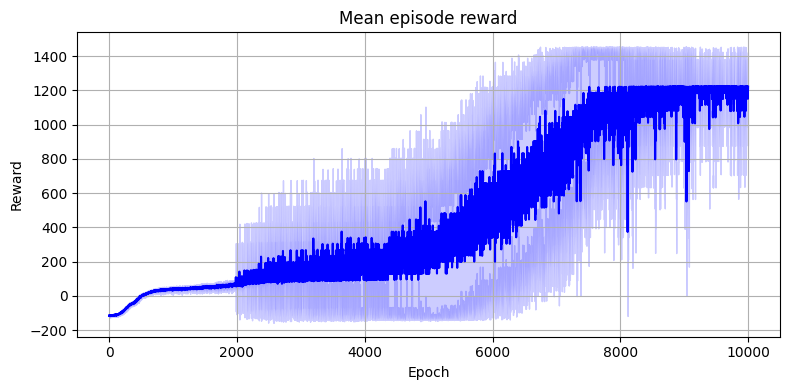

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
epochs = np.arange(train_metrics["total_loss"].shape[0])

mean_rewards = train_metrics["mean_episode_reward"]
std_rewards = train_metrics["std_episode_reward"]
ax.plot(mean_rewards, c="b")
ax.fill_between(epochs, mean_rewards - std_rewards, mean_rewards + std_rewards, alpha=0.2, color="b")
ax.set_title("Mean episode reward")
ax.set_xlabel("Epoch")
ax.set_ylabel("Reward")
ax.grid(True)

plt.tight_layout()
plt.show()

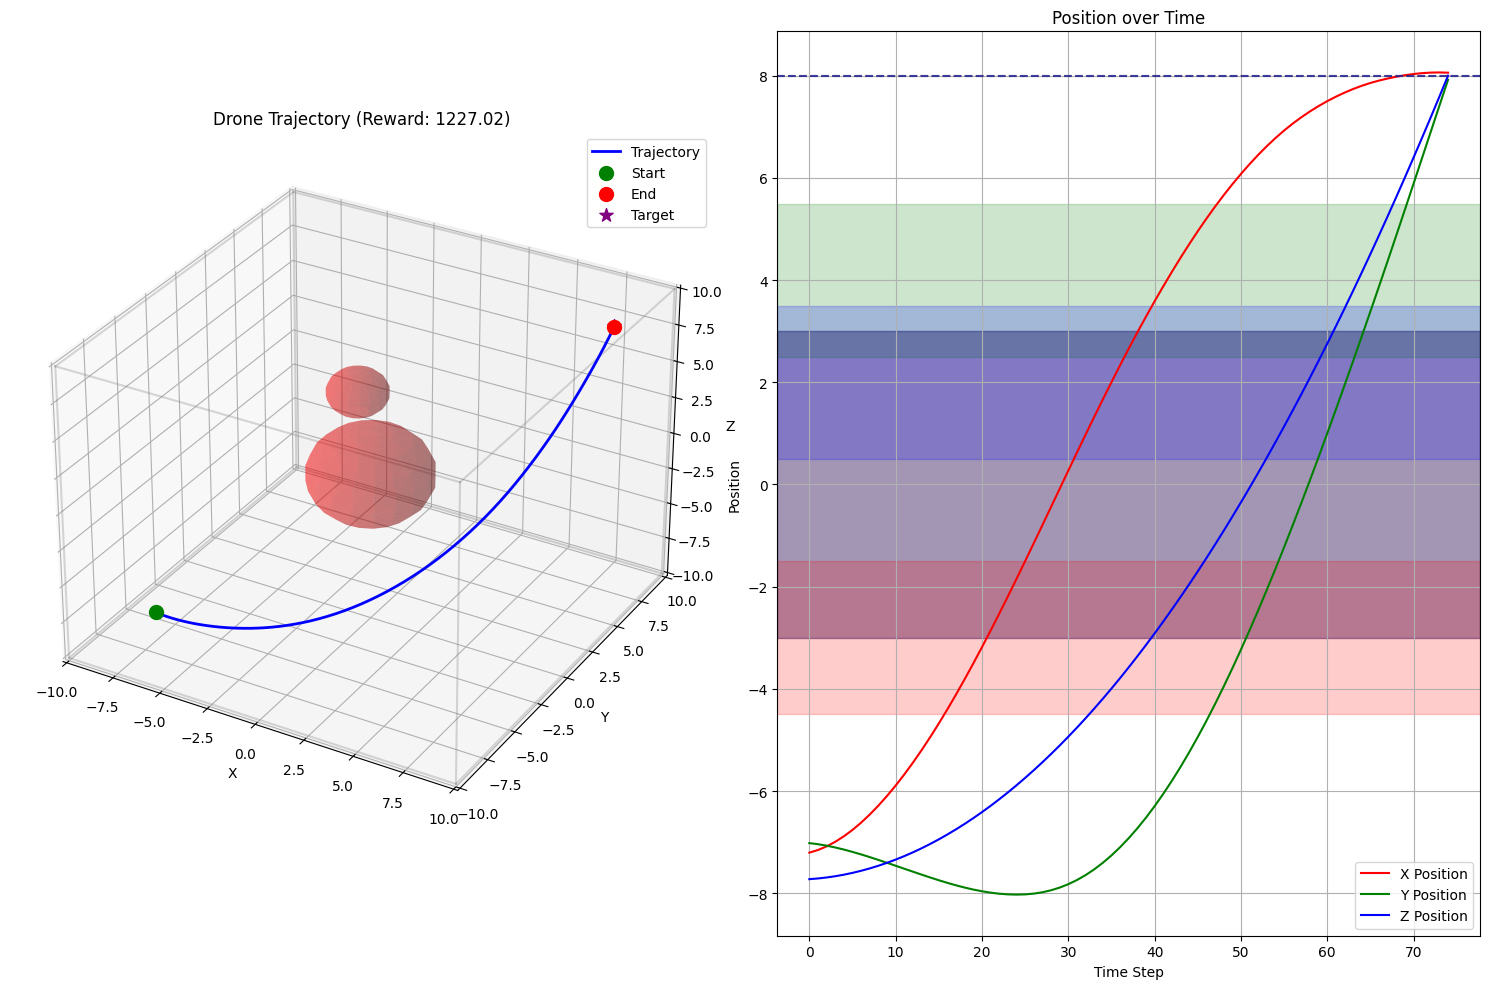

In [86]:
key = jr.PRNGKey(3)
run_key, key = jr.split(key)

env = Drone()

successes, episode_rewards, trajectories = evaluate(
    run_key,
    env,
    training_state.policy_params,
    make_policy,
    unroll_length=200,
    num_evals=1,
)

visualize_trajectory_3d(env, episode_rewards[0], trajectories[0].position)

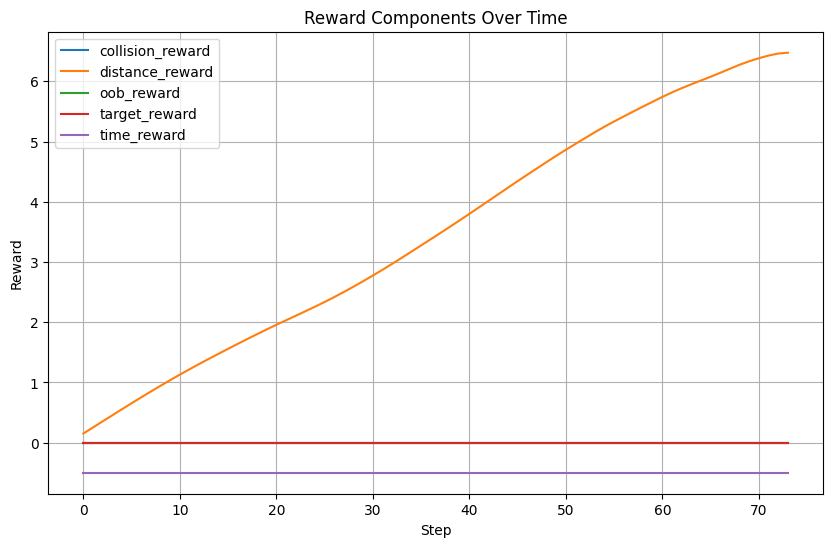

In [87]:
# Plot rewards
metrics = trajectories[0].metrics
plt.figure(figsize=(10, 6))
for key, values in metrics.items():
    if "reward" in key:
        plt.plot(values[:-1], label=key)

plt.title("Reward Components Over Time")
plt.xlabel("Step")
plt.ylabel("Reward")
plt.legend()
plt.grid(True)
plt.show()


In [88]:
# Evaluate

N = 200
key = jr.PRNGKey(seed)
run_key, key = jr.split(key)
env = Drone()

successes, episode_rewards, trajectories = evaluate(
    run_key,
    env,
    training_state.policy_params,
    make_policy,
    unroll_length=200,
    num_evals=N,
)

success_rate = np.sum(successes) / N
print(f"Success rate: {success_rate:.2f}")

Success rate: 1.00
